In [1]:
import numpy as np
import pandas as pd

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv('automobile_new.csv', names= headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,3.255423,9.40,135,6000,16,23,15645
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.580000,3.640000,21.50,123,4350,22,25,28176
145,0,85.0,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.620000,2.640000,7.70,111,4800,23,23,11694
128,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.540000,3.070000,9.31,110,5250,21,28,11850
139,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.620000,2.640000,9.00,94,5200,26,32,9960


<h3>Why binning?</h3>

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

In [7]:
df['horsepower']

55     135
66     123
145    111
128    110
139     94
160     70
153     70
57      84
7      110
147     62
Name: horsepower, dtype: int64

<h3>Example of Binning Data In Pandas</h3>

Convert data to correct format:

In [8]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.

In [12]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'horsepower bins')

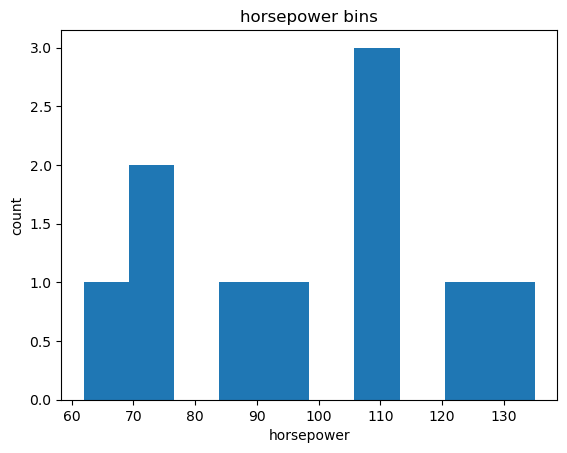

In [13]:
plt.pyplot.hist(df['horsepower'])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [14]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 62.        ,  86.33333333, 110.66666667, 135.        ])

In [15]:
# We set group names:
group_names = ['Low', 'Medium', 'High']
group_names

['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of df['horsepower'] belongs to.

In [16]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

In [17]:
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
55,135,High
66,123,High
145,111,High
128,110,Medium
139,94,Medium
160,70,Low
153,70,Low
57,84,Low
7,110,Medium
147,62,Low


Let's see the number of vehicles in each bin:

In [18]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       4
Medium    3
High      3
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

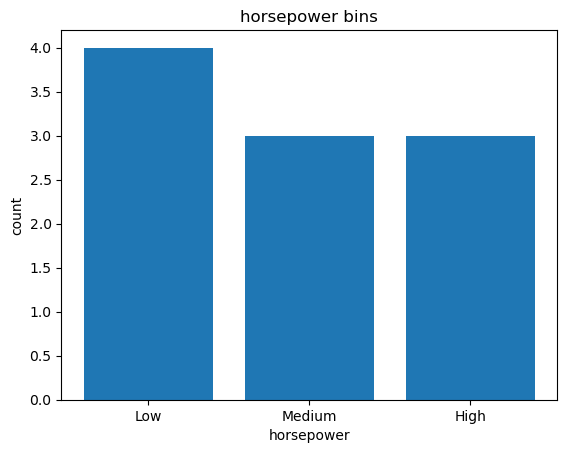

In [19]:
# Let's plot the distribution of each bin:
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

Now the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").

Successfully narrowed down the intervals from 59 to 3!

<h3>Bins Visualization</h3>

Normally, a histogram is used to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

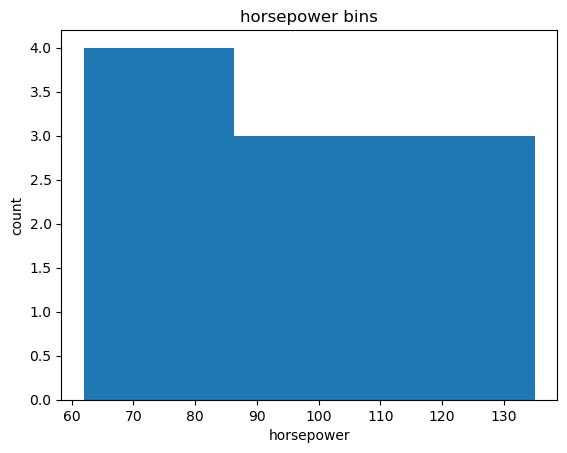

In [21]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df['horsepower'], bins=3)

# set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')